In [1]:
# STEP 1: Import libraries for data handling, models and evaluation

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


In [3]:
# STEP 2: Load datasets

red_path = r"C:\Users\suyog\OneDrive\Desktop\ICP\5th sem\ai ml\cw\dataset\wine+quality\winequality-red.csv"
white_path = r"C:\Users\suyog\OneDrive\Desktop\ICP\5th sem\ai ml\cw\dataset\wine+quality\winequality-white.csv"

red = pd.read_csv(red_path, sep=";")
white = pd.read_csv(white_path, sep=";")


In [5]:
# STEP 3: Combine red and white wine data

wine = pd.concat([red, white], axis=0)


In [7]:
# STEP 4: Convert quality into binary class
# Good wine (1): quality >= 6
# Bad wine (0): quality < 6

wine["quality_label"] = wine["quality"].apply(lambda x: 1 if x >= 6 else 0)


In [9]:
# STEP 5: Separate features and target

X = wine.drop(["quality", "quality_label"], axis=1)
y = wine["quality_label"]


In [11]:
# STEP 6: Train test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
# STEP 7: Initialize models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

accuracy_results = {}
confusion_matrices = {}


In [15]:
# STEP 8: Train models and store results

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    acc = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    
    accuracy_results[name] = acc
    confusion_matrices[name] = cm
    
    print("\n", name)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)



 Logistic Regression
Accuracy: 0.7269230769230769
Confusion Matrix:
 [[264 187]
 [168 681]]

 Decision Tree
Accuracy: 0.7492307692307693
Confusion Matrix:
 [[305 146]
 [180 669]]

 Random Forest
Accuracy: 0.8253846153846154
Confusion Matrix:
 [[339 112]
 [115 734]]

 KNN
Accuracy: 0.6738461538461539
Confusion Matrix:
 [[229 222]
 [202 647]]


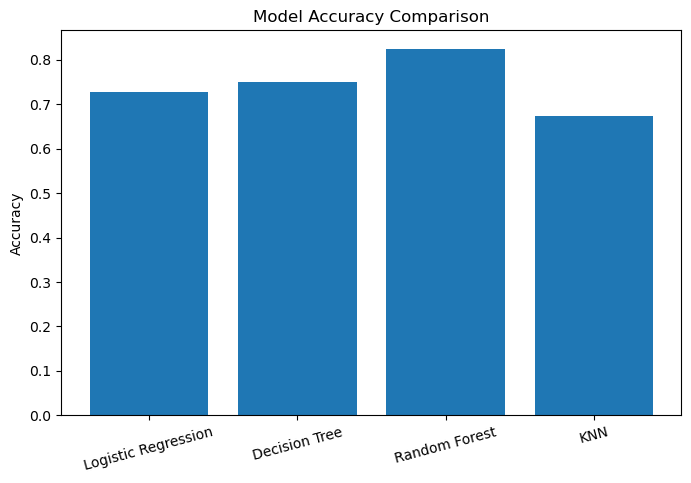

In [17]:
# STEP 9: Visualize accuracy comparison of models

plt.figure(figsize=(8,5))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()


Best Performing Model: Random Forest


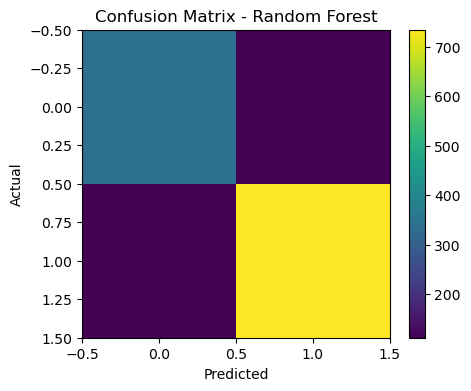

In [19]:
# STEP 10: Identify best model and display its confusion matrix

best_model_name = max(accuracy_results, key=accuracy_results.get)
best_cm = confusion_matrices[best_model_name]

print("Best Performing Model:", best_model_name)

plt.figure(figsize=(5,4))
plt.imshow(best_cm)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
# STEP 11: Final conclusion

for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.4f}")

print("\nFinal Selected Model:", best_model_name)


Logistic Regression: 0.7269
Decision Tree: 0.7492
Random Forest: 0.8254
KNN: 0.6738

Final Selected Model: Random Forest


In [29]:
# STEP 12: Take basic input from user for wine prediction

print("\nEnter wine chemical properties to predict quality:\n")

user_input = {
    "fixed acidity": float(input("Fixed Acidity: ")),
    "volatile acidity": float(input("Volatile Acidity: ")),
    "citric acid": float(input("Citric Acid: ")),
    "residual sugar": float(input("Residual Sugar: ")),
    "chlorides": float(input("Chlorides: ")),
    "free sulfur dioxide": float(input("Free Sulfur Dioxide: ")),
    "total sulfur dioxide": float(input("Total Sulfur Dioxide: ")),
    "density": float(input("Density: ")),
    "pH": float(input("pH: ")),
    "sulphates": float(input("Sulphates: ")),
    "alcohol": float(input("Alcohol: "))
}



Enter wine chemical properties to predict quality:



Fixed Acidity:  7
Volatile Acidity:  2
Citric Acid:  8
Residual Sugar:  5
Chlorides:  4
Free Sulfur Dioxide:  3
Total Sulfur Dioxide:  2
Density:  2
pH:  5
Sulphates:  4
Alcohol:  3


In [31]:
# STEP 13: Convert input into DataFrame

user_df = pd.DataFrame([user_input])


In [33]:
# STEP 14: Select best performing model

best_model = models[best_model_name]


In [35]:
# STEP 15: Predict wine quality using trained model

prediction = best_model.predict(user_df)


In [37]:
# STEP 16: Get prediction probability

prediction_prob = best_model.predict_proba(user_df)


In [39]:
# STEP 17: Display prediction result

if prediction[0] == 1:
    print("\nPredicted Result: GOOD QUALITY WINE 🍷")
    print("Confidence:", round(prediction_prob[0][1] * 100, 2), "%")
else:
    print("\nPredicted Result: BAD QUALITY WINE 🍷")
    print("Confidence:", round(prediction_prob[0][0] * 100, 2), "%")



Predicted Result: GOOD QUALITY WINE 🍷
Confidence: 59.0 %


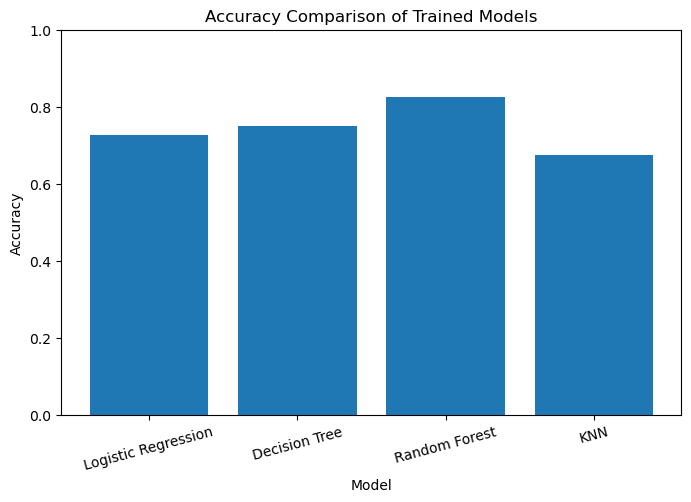

In [41]:
# CHART 1: Model accuracy comparison

plt.figure(figsize=(8,5))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.title("Accuracy Comparison of Trained Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.ylim(0,1)
plt.show()


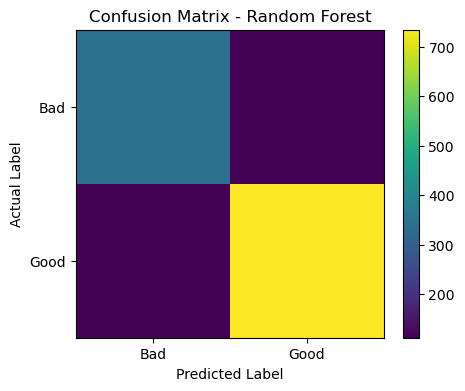

In [43]:
# CHART 2: Confusion matrix for best model

plt.figure(figsize=(5,4))
plt.imshow(best_cm)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.colorbar()

plt.xticks([0,1], ["Bad", "Good"])
plt.yticks([0,1], ["Bad", "Good"])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


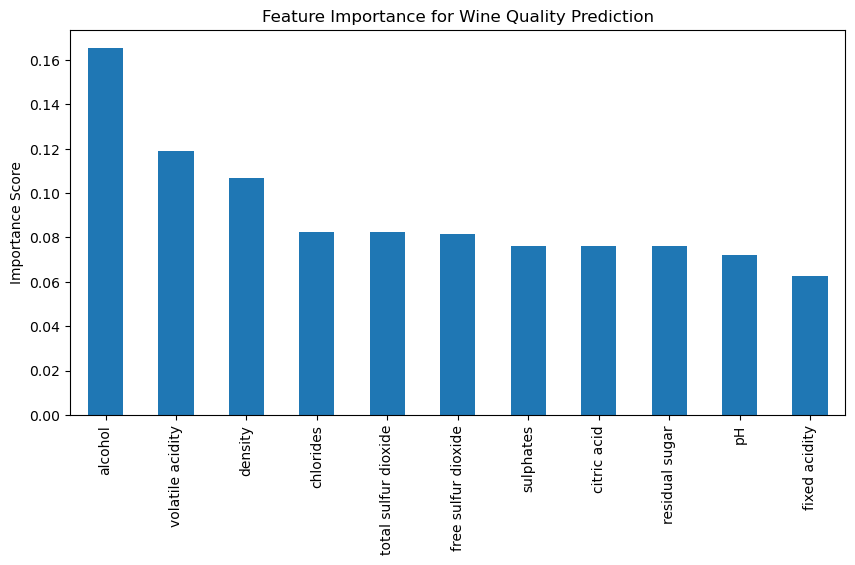

In [45]:
# CHART 3: Feature importance 

feature_importance = pd.Series(
    best_model.feature_importances_,
    index=user_df.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,5))
feature_importance.plot(kind="bar")
plt.title("Feature Importance for Wine Quality Prediction")
plt.ylabel("Importance Score")
plt.show()


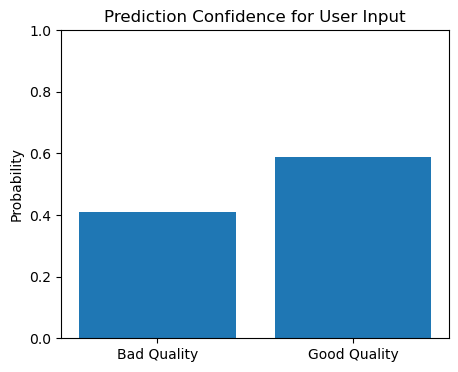

In [47]:
# CHART 4: Prediction confidence for user input

labels = ["Bad Quality", "Good Quality"]
probabilities = prediction_prob[0]

plt.figure(figsize=(5,4))
plt.bar(labels, probabilities)
plt.title("Prediction Confidence for User Input")
plt.ylabel("Probability")
plt.ylim(0,1)
plt.show()


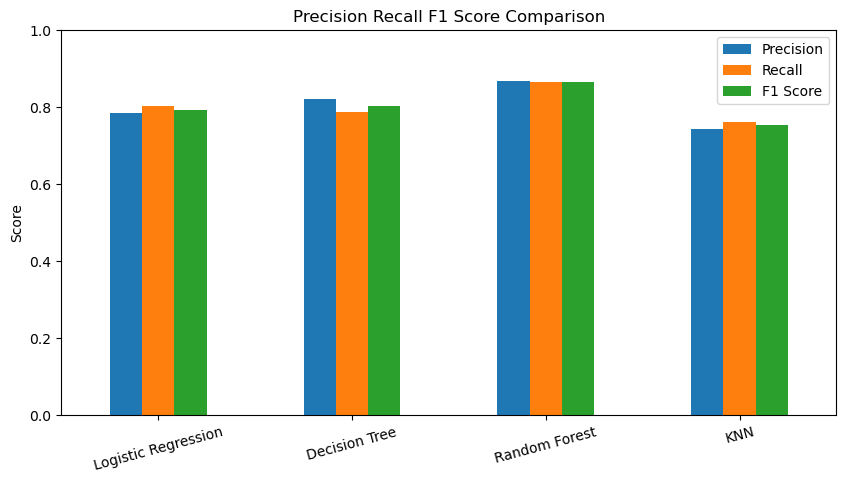

In [50]:
# CHART 5: Precision, Recall, F1 comparison

from sklearn.metrics import precision_score, recall_score, f1_score

precision = {}
recall = {}
f1 = {}

for name, model in models.items():
    preds = model.predict(X_test)
    precision[name] = precision_score(y_test, preds)
    recall[name] = recall_score(y_test, preds)
    f1[name] = f1_score(y_test, preds)

metrics_df = pd.DataFrame({
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

metrics_df.plot(kind="bar", figsize=(10,5))
plt.title("Precision Recall F1 Score Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.show()


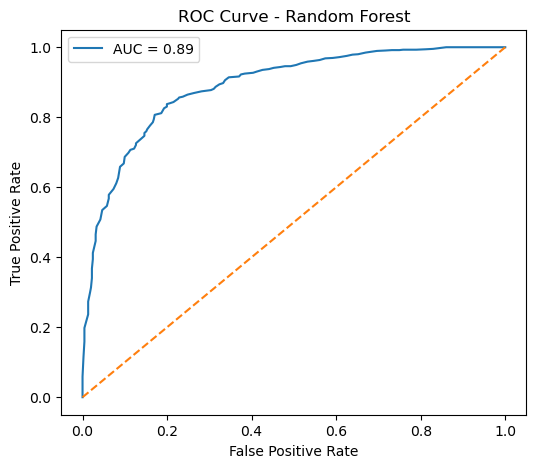

In [52]:
# CHART 6: ROC curve for best model

from sklearn.metrics import roc_curve, auc

y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name}")
plt.legend()
plt.show()


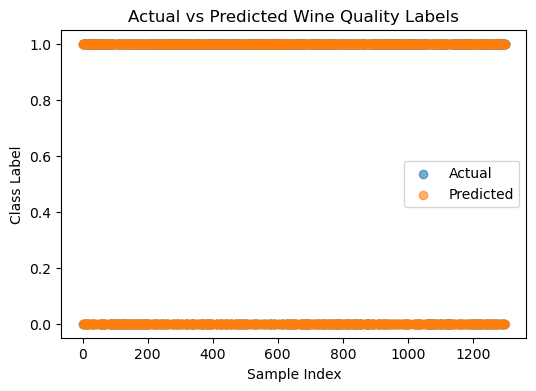

In [60]:
# CHART 7: Actual vs Predicted comparison 


y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, label="Predicted", alpha=0.6)
plt.title("Actual vs Predicted Wine Quality Labels")
plt.ylabel("Class Label")
plt.xlabel("Sample Index")
plt.legend()
plt.show()


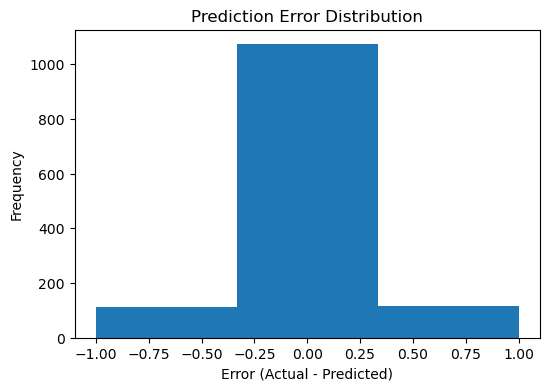

In [62]:
# CHART 8:  (best model)

y_pred = best_model.predict(X_test)
errors = y_test - y_pred

plt.figure(figsize=(6,4))
plt.hist(errors, bins=3)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


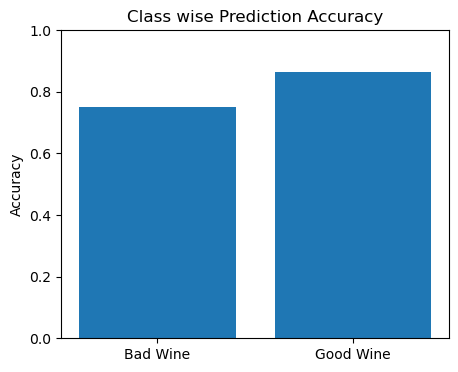

In [64]:
# CHART 9: Class wise accuracy

cm = confusion_matrix(y_test, y_pred)

class_accuracy = {
    "Bad Wine": cm[0,0] / cm[0].sum(),
    "Good Wine": cm[1,1] / cm[1].sum()
}

plt.figure(figsize=(5,4))
plt.bar(class_accuracy.keys(), class_accuracy.values())
plt.title("Class wise Prediction Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


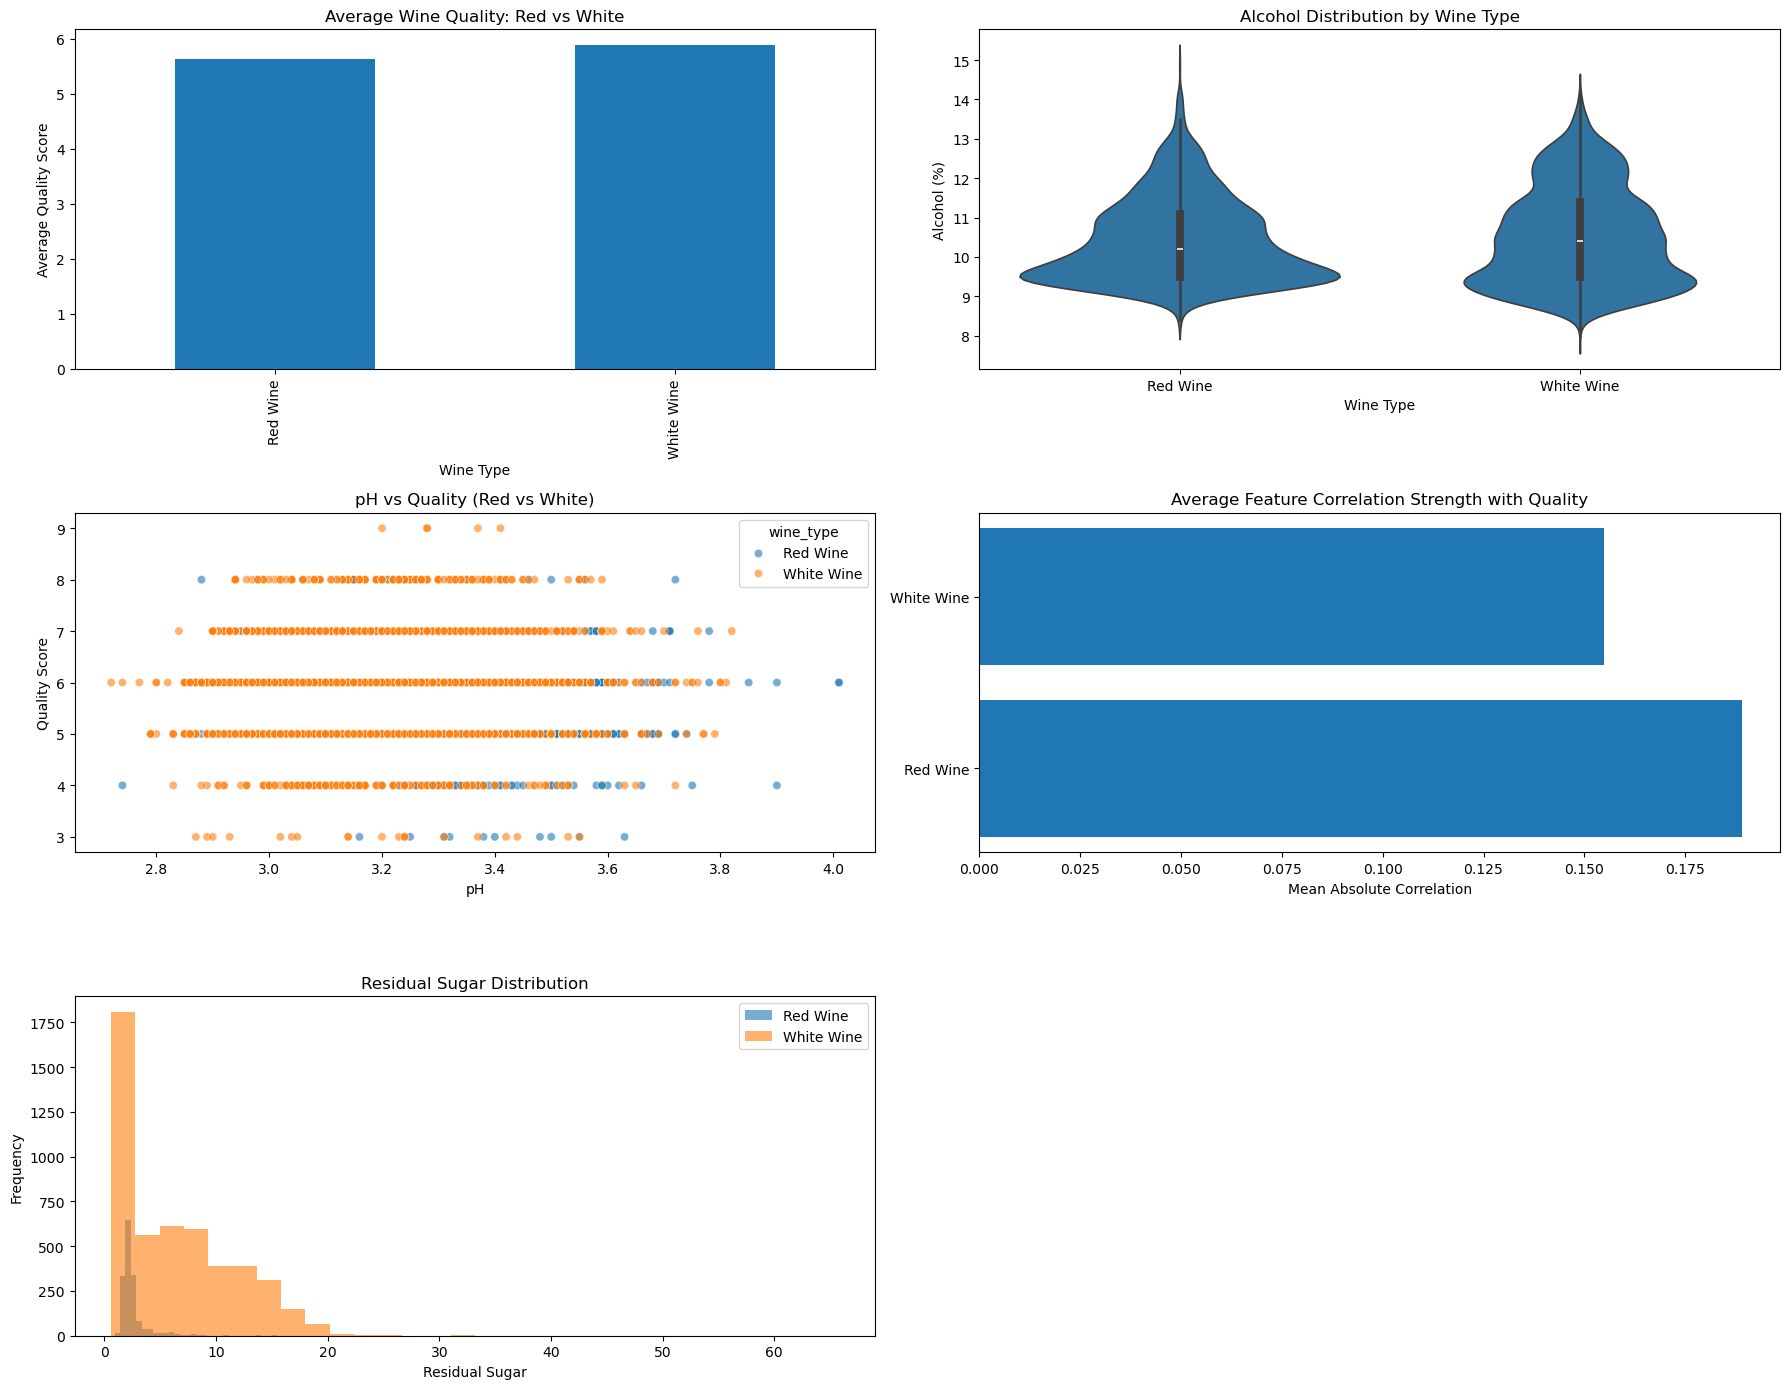

In [68]:
# ONE CELL: Create wine_type column + 5 Red vs White Wine charts 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# -------------------- FIX: Add wine_type column --------------------
red_plot = red.copy()
white_plot = white.copy()

red_plot["wine_type"] = "Red Wine"
white_plot["wine_type"] = "White Wine"

wine_plot = pd.concat([red_plot, white_plot], axis=0)

# -------------------- Create plots --------------------
plt.figure(figsize=(18,14))

# Chart 1: Average Quality Comparison
plt.subplot(3,2,1)
wine_plot.groupby("wine_type")["quality"].mean().plot(kind="bar")
plt.title("Average Wine Quality: Red vs White")
plt.ylabel("Average Quality Score")
plt.xlabel("Wine Type")

# Chart 2: Alcohol Distribution (Violin Plot)
plt.subplot(3,2,2)
sns.violinplot(x="wine_type", y="alcohol", data=wine_plot)
plt.title("Alcohol Distribution by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Alcohol (%)")

# Chart 3: pH vs Quality (Scatter Plot)
plt.subplot(3,2,3)
sns.scatterplot(x="pH", y="quality", hue="wine_type", data=wine_plot, alpha=0.6)
plt.title("pH vs Quality (Red vs White)")
plt.xlabel("pH")
plt.ylabel("Quality Score")

# Chart 4: Mean Feature Strength vs Quality
plt.subplot(3,2,4)
red_corr = red.corr()["quality"].drop("quality").abs().mean()
white_corr = white.corr()["quality"].drop("quality").abs().mean()
plt.barh(["Red Wine", "White Wine"], [red_corr, white_corr])
plt.title("Average Feature Correlation Strength with Quality")
plt.xlabel("Mean Absolute Correlation")

# Chart 5: Residual Sugar Distribution
plt.subplot(3,2,5)
plt.hist(red["residual sugar"], bins=30, alpha=0.6, label="Red Wine")
plt.hist(white["residual sugar"], bins=30, alpha=0.6, label="White Wine")
plt.title("Residual Sugar Distribution")
plt.xlabel("Residual Sugar")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
# ONE CELL: Finalize best model, save it, reload it, and verify prediction

import joblib
import pandas as pd

# -------------------- Step 1: Finalize best model --------------------
final_model = best_model
print("Final Selected Model:", best_model_name)

# -------------------- Step 2: Save trained model --------------------
joblib.dump(final_model, "wine_quality_final_model.pkl")
print("Model saved as wine_quality_final_model.pkl")

# -------------------- Step 3: Load model back --------------------
loaded_model = joblib.load("wine_quality_final_model.pkl")
print("Model loaded successfully")

# -------------------- Step 4: Verify prediction using user input --------------------
loaded_prediction = loaded_model.predict(user_df)
loaded_probability = loaded_model.predict_proba(user_df)

# -------------------- Step 5: Display final output --------------------
if loaded_prediction[0] == 1:
    print("\nPrediction Result: GOOD QUALITY WINE")
    print("Confidence:", round(loaded_probability[0][1] * 100, 2), "%")
else:
    print("\nPrediction Result: BAD QUALITY WINE")
    print("Confidence:", round(loaded_probability[0][0] * 100, 2), "%")

# -------------------- Step 6: Summary --------------------
print("\nWorkflow Completed:")
print("• Best model selected")
print("• Model saved and reloaded")
print("• Prediction verified successfully")


Final Selected Model: Random Forest
Model saved as wine_quality_final_model.pkl
Model loaded successfully

Prediction Result: GOOD QUALITY WINE
Confidence: 59.0 %

Workflow Completed:
• Best model selected
• Model saved and reloaded
• Prediction verified successfully
